In [ ]:
from google.colab import drive

drive.mount('/content/drive')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
filename='/content/sales_predictions (3).csv'
df=pd.read_csv(filename)

In [ ]:
# 1. How many rows and columns?
df.shape
# 8523 rows and 12 columns

(8523, 12)

In [ ]:
#2.  What are the datatypes of each variable?
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
#3.  Are there duplicates?  If yes, drop them.
df[df.duplicated(keep=False)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [ ]:
#4 & #5 & #6  Identify missing values
df.isnull().sum()
# Missing values in Item_Weight and Outlet_Size
# The missing value rows are dropped since it seems
# difficult to interpolate values for the missing cells.
df = df.dropna()
df.isnull().any()

Item_Identifier              False
Item_Weight                  False
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                  False
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
dtype: bool

In [ ]:
#7 Fix inconsistent data

In [ ]:
#8 Summary statistics of numerical columns
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,4650.000000,4650.000000,4650.000000,4650.000000,4650.000000
mean,12.898675,0.060700,141.716328,1999.190538,2272.037489
std,4.670973,0.044607,62.420534,7.388800,1497.964740
min,4.555000,0.000000,31.490000,1987.000000,69.243200
25%,8.770000,0.025968,94.409400,1997.000000,1125.202000
50%,12.650000,0.049655,142.979900,1999.000000,1939.808300
75%,17.000000,0.088736,186.614150,2004.000000,3111.616300
max,21.350000,0.188323,266.888400,2009.000000,10256.649000


(0.0, 1400.0)

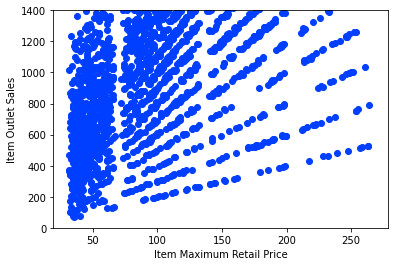

In [ ]:
### Start Visualizations for PART 4 ###

# Correlation between Outlet Sales and MRP (per heatmap from last week)
x = df['Item_MRP']
y = df['Item_Outlet_Sales']
plt.style.use('seaborn-bright')
plt.scatter(x,y)

plt.xlabel('Item Maximum Retail Price')
plt.ylabel('Item Outlet Sales')
plt.ylim(bottom=0, top=1400)

Text(0.5, 1.0, 'Relationship between Fat Content and Sales')

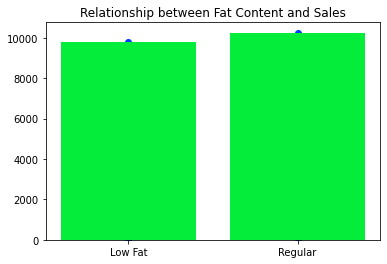

In [ ]:
#  Correlation between Fat Content and Item Outlet Sales
#  Clean data so that Low Fat labels and Regular labels are
#  consistent

df['Item_Fat_Content'].replace({'low fat':"Low Fat",'LF':'Low Fat','reg':'Regular'}, inplace=True)
x = df['Item_Fat_Content']
y = df['Item_Outlet_Sales']

plt.scatter(x,y)
plt.bar(x,y)
plt.title("Relationship between Fat Content and Sales")

Text(0, 0.5, 'Sales')

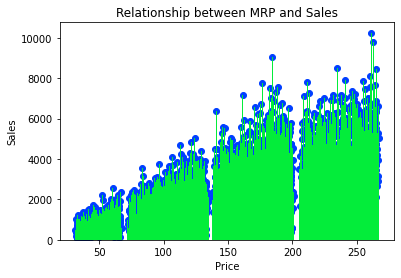

In [283]:
x = df['Item_MRP']
plt.scatter(x,y)
plt.bar(x,y)
plt.title("Relationship between MRP and Sales")
plt.xlabel('Price')
plt.ylabel('Sales')

In [ ]:
### PART 5  ###

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
#  There are many columns that are objects, that would need to be turned
#  into numerical variables.  These are Item Identifier, Item Fat Content,
#  Item Type, Outlet Identifier,Outlet Size, Outlet Location Type, and
#  Outlet Type.

#  I do not think there is any value in using Item Identifier and Outlet
#  Identifier in the regression as features.  I plan not to use those two
#  columns

#  Item Fat Content is an ordinal variable.  However, there are only two
#  values possible, so I plan to treat it as a Nominal variable.
#  Item Type, Outlet Location Type, and Outlet Type are Nominal
#  variables.  Outlet Size will be dropped due to missing values.
#  All 4 columns will be one hot encoded.

In [ ]:
# Check for missing values
df.isnull().values.any()

False

In [ ]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
df.drop(columns=['Item_Weight','Outlet_Size'], axis=1, inplace=True)

In [ ]:
df.isnull().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
#  One Hot Encode
df = pd.get_dummies(df, columns = ['Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type',
                                   'Outlet_Type'], drop_first = True)
df.head()


,Item_Identifier,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type2
0,FDA15,0.016047,249.8092,OUT049,1999,3735.1380,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,DRC01,0.019278,48.2692,OUT018,2009,443.4228,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
2,FDN15,0.016760,141.6180,OUT049,1999,2097.2700,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,NCD19,0.000000,53.8614,OUT013,1987,994.7052,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
5,FDP36,0.000000,51.4008,OUT018,2009,556.6088,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [ ]:
df.drop(columns=['Item_Identifier'], axis=1, inplace=True)
df.drop(columns=['Outlet_Identifier'], axis=1, inplace=True)

df.dtypes

Item_Visibility                    float64
Item_MRP                           float64
Outlet_Establishment_Year            int64
Item_Outlet_Sales                  float64
Item_Fat_Content_Regular             uint8
Item_Type_Breads                     uint8
Item_Type_Breakfast                  uint8
Item_Type_Canned                     uint8
Item_Type_Dairy                      uint8
Item_Type_Frozen Foods               uint8
Item_Type_Fruits and Vegetables      uint8
Item_Type_Hard Drinks                uint8
Item_Type_Health and Hygiene         uint8
Item_Type_Household                  uint8
Item_Type_Meat                       uint8
Item_Type_Others                     uint8
Item_Type_Seafood                    uint8
Item_Type_Snack Foods                uint8
Item_Type_Soft Drinks                uint8
Item_Type_Starchy Foods              uint8
Outlet_Location_Type_Tier 2          uint8
Outlet_Location_Type_Tier 3          uint8
Outlet_Type_Supermarket Type2        uint8
dtype: obje

In [ ]:
y = df['Item_Outlet_Sales']
X = df.drop(columns = 'Item_Outlet_Sales')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
from sklearn.metrics import mean_squared_error
print('Training RMSE:', np.sqrt(mean_squared_error(y_train, reg.predict(X_train))))
print('Testing RMSE:', np.sqrt(mean_squared_error(y_test, reg.predict(X_test))))
# The testing RMSE has a lower error value than the training RMSE, which is good.

Training RMSE: 1094.2474843652126
Testing RMSE: 1070.3836974479102


In [ ]:
# R Sq Value
train_score = reg.score(X_train, y_train)
print(train_score)

0.4680085326384317


In [ ]:
test_score = reg.score(X_test, y_test)
print(test_score)
# R sq of both Train and Test data is 0.56, which is not a high score.
# This is not a good model.

0.4842092396947944


In [ ]:
# Project 1 Final
# Decision Tree, Bagged Tree and Random Forest
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dec_tree = DecisionTreeRegressor(random_state = 42)

In [ ]:
dec_tree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [ ]:
train_preds = dec_tree.predict(X_train)
test_preds = dec_tree.predict(X_test)

In [ ]:
train_score = dec_tree.score(X_train, y_train)
test_score = dec_tree.score(X_test, y_test)
print(train_score)
print(test_score)

1.0
-0.062343580349059735


In [ ]:
from sklearn.metrics import mean_squared_error
print('Training RMSE:', np.sqrt(mean_squared_error(y_train, dec_tree.predict(X_train))))
print('Testing RMSE:', np.sqrt(mean_squared_error(y_test, dec_tree.predict(X_test))))

Training RMSE: 0.0
Testing RMSE: 1536.1555908062178


In [ ]:
# Bagged Tree
from sklearn.ensemble import BaggingRegressor
bagreg = BaggingRegressor(random_state=42)

In [ ]:
bagreg.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=42, verbose=0,
                 warm_start=False)

In [ ]:
bagreg_train_score = bagreg.score(X_train, y_train)
bagreg_test_score = bagreg.score (X_test, y_test)
print(bagreg_train_score)
print(bagreg_test_score)

0.8804909518359455
0.33516855395710243


In [ ]:
print('Training RMSE:', np.sqrt(mean_squared_error(y_train, bagreg.predict(X_train))))
print('Testing RMSE:', np.sqrt(mean_squared_error(y_test, bagreg.predict(X_test))))

Training RMSE: 518.6371442275554
Testing RMSE: 1215.230003204361


In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)


In [ ]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)
print(rf_train_score)
print(rf_test_score)

0.9135972093073427
0.3942308951815249


In [ ]:
print('Training RMSE:', np.sqrt(mean_squared_error(y_train, rf.predict(X_train))))
print('Testing RMSE:', np.sqrt(mean_squared_error(y_test, rf.predict(X_test))))

Training RMSE: 440.9883418516346
Testing RMSE: 1159.9953994476778


In [ ]:
# The Regression model has the highest R2 for the testing data (0.48), and an 
# R2 of 0.47 for the training data.  Based on R2 alone, it is the better model
# of the ones used here.  However, this R2 is not a high R2.  

# It also has the lowest RMSE for the testing data of 1070.  Based on the RMSE, 
# I would again choose the Regression model.